In [48]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# suppress annoying harmless error
warnings.filterwarnings(
    action = 'ignore',
    module = 'scipy',
    message = '^internal gelsd')

In [49]:
# acquire, load, and preview the data
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [50]:
# instantiate and fit our model
regr = linear_model.LinearRegression()
y = data['Sales'].values.reshape(-1, 1)
x = data[['TV', 'Radio', 'Newspaper']]
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercepts: \n', regr.intercept_)
print('\nR-Squared: \n')
print(regr.score(x, y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercepts: 
 [ 2.93888937]

R-Squared: 

0.897210638179


The model where the outcome Sales is predicted by the features TV, Radio, and Newspaper explains 89.7% of the variance in Sales. Note that we don't know from these results how much of that variance is explained by each of the three features. Looking at the coefficients, there appears to be a base rate of Sales that happen even with no ads in any medium (intercept: 2.939) and sales have the highest per-unit increase when ads are on the radio (0.189)

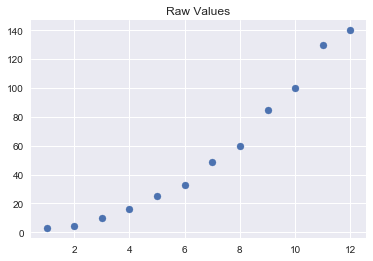

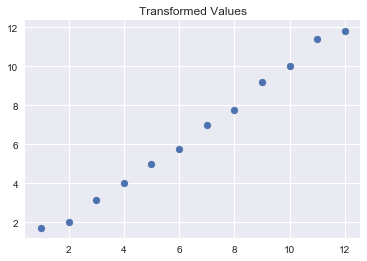

In [52]:
# Example of fixing features with a non-linear relationship to the outcome
outcome = [1, 2, 3,4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# plot the data as-is.  Looks somewhat quadratic.
plt.scatter(outcome, feature)
plt.title('Raw Values')
plt.show()

# create a feature using a non-linear transformation
sqrt_feature = [math.sqrt(x) for x in feature]

# well now, isn't that nice
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed Values')
plt.show()

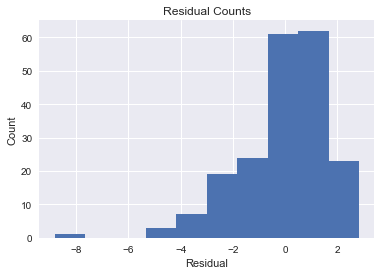

count   200.000
mean     -0.000
std       1.673
min      -8.828
25%      -0.891
50%       0.242
75%       1.189
max       2.829
Name: Sales, dtype: float64

In [53]:
# example of assumption of multivariate normality in multiple regression

#extract predicted values
predicted = regr.predict(x).ravel()
actual = data['Sales']

# calculate the error, also called the residual
residual = actual - predicted

# this looks a bit concerning
plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

residual.describe()

# outliers or skewness in error can often be traced back to outliers or skewness in data

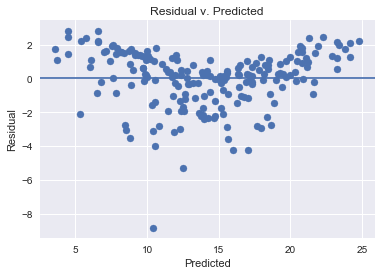

In [54]:
# example showing non-homoscedastic error terms (a violation of Assumption 3)

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual v. Predicted')
plt.show()

#hmmmm looks a bit concerning

In [55]:
# example on assumption #4; low multicollinearity

correlation_matrix = x.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [56]:
# Need to address non-normality of the residual distribution
# look for outliers in the data that might make the data non-normal or skewed

data['Residuals'] = residual
data['Residuals']

data['Residuals'][np.abs(data['Residuals']) > 3]

3     -3.008
6     -5.278
26    -3.610
36    -4.207
57    -3.028
76    -3.158
79    -3.513
127   -3.977
131   -8.828
159   -3.084
179   -4.211
Name: Residuals, dtype: float64

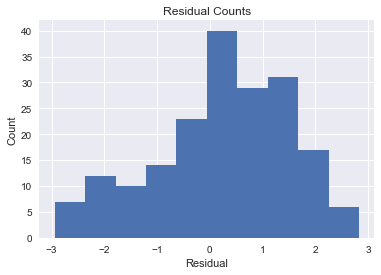

count   189.000
mean      0.243
std       1.316
min      -2.942
25%      -0.329
50%       0.333
75%       1.255
max       2.829
Name: Sales, dtype: float64

In [57]:
# create a new DataFrame that drops all the outliers

data_1 = data.drop([3, 6, 26, 36, 57, 76, 79, 127, 131, 159, 179])

# check to see if the residuals from the new DataFrame are normally distributed

x_1 = data_1[['TV', 'Radio', 'Newspaper']]

#extract predicted values
predicted_1 = regr.predict(x_1).ravel()
actual_1 = data_1['Sales']

# calculate the error, also called the residual
residual_1 = actual_1 - predicted_1

# this looks a bit concerning
plt.hist(residual_1)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

residual_1.describe()

In [71]:
# Need to address the hetero-scedasticity in the distribution of the error terms

# Lets see if a Box-Cox transformation is sufficient to solve the problem of heteroscedasticity

from scipy import stats
import itertools

yt = stats.boxcox(data_1['Sales'])

print(len(yt))

# convert array into list

var = list(yt)
var1 = list(itertools.chain(*var0))

2


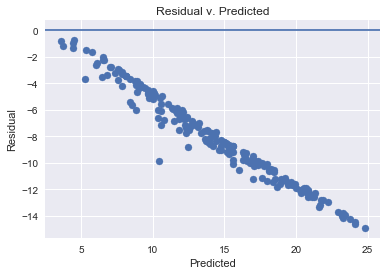

189


In [66]:
# create a column of the dependent variable after the BoxCox transformation
data['yt'] = var1

# test to see if the error terms are still heteroscedastic

actual_2 = data['yt']
residual_2 = actual_2 - predicted

plt.scatter(predicted, residual_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual v. Predicted')
plt.show()